# Semaine 9 : Manipulation de données expérimentales avec Python

## Objectifs de la leçon

Apprendre à :
- Lire un fichier CSV contenant des données expérimentales.
- Nettoyer et sauvegarder un nouveau fichier corrigé.
- Manipuler un DataFrame Pandas (sélection, ajout, statistiques).
- Transformer les colonnes en tableaux NumPy pour des calculs scientifiques.
- Visualiser les données sous forme de nuage de points.


## Lecture d’un fichier CSV avec `pandas.read_csv()`

On importe d'abord la bibliothèque **pandas**, puis on lit un fichier CSV.  
Les fichiers CSV européens utilisent souvent la **virgule comme séparateur** et la **virgule comme décimale**.

Pour les lire correctement :
- `delimiter` → définit le séparateur (`;` ou `,`)
- `decimal` → définit le symbole décimal (`','` ou `'.'`)

Exemple avec un petit jeu de données appelé `mesures.csv` :
NB: Le fichier doit se trouver dans le même dossier que le fichier .ipynb et ce dernier doit être ouvert via VS Code (Fichier > Ouvrir > Dossier_contenant_les_deux_fichiers)

In [28]:
import pandas as pd

# Lecture du fichier CSV avec des paramètres adaptés
df = pd.read_csv("mesures.csv", delimiter=";", decimal=",", encoding="utf-8")

# Affichage du DataFrame (NaN pour les valeurs manquantes)
print(df) # vs df

# Affichage des 5 premières lignes
df.head()

# Affichage des 5 dernières lignes
df.tail()

# Affichage des statistiques de base
df.describe()

# Identification des valeurs manquantes
df.isna()

       x     v
0   0.00  0.00
1   0.02  0.35
2   0.04  0.60
3   0.06  0.82
4   0.08  0.96
5   0.10  1.05
6   0.12  1.18
7   0.14  1.26
8   0.16  1.35
9   0.18  1.42
10  0.20  1.50


,x,v
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


## Exportation du fichier corrigé avec `to_csv()`

On peut sauvegarder un **nouveau fichier nettoyé ou corrigé** (par exemple, après conversion ou suppression de lignes invalides).

In [29]:
# Suppression des lignes contenant des valeurs manquantes
# df_corrige = df.dropna()

# OU

# Remplacement des valeurs manquantes par la moyenne de Solubilité
moyenne = df["v"].mean()
df_corrige = df.fillna(moyenne)

# Exportation du fichier nettoyé
df_corrige.to_csv("mesures_corrigees.csv", index=False)
print("Fichier nettoyé enregistré sous 'mesures_corrigees.csv'")

Fichier nettoyé enregistré sous 'mesures_corrigees.csv'


### Affichage de statistiques rapides (Après nettoyage)

In [30]:
df_corrige.describe()

,x,v
count,11.000000,11.000000
mean,0.100000,0.953636
std,0.066332,0.473736
min,0.000000,0.000000
25%,0.050000,0.710000
50%,0.100000,1.050000
75%,0.150000,1.305000
max,0.200000,1.500000


## Manipulation de DataFrames (Pandas)

### Sélection d’une colonne
On peut accéder à une colonne du DataFrame à l’aide des crochets : `df["nom_colonne"]`

In [31]:
# Sélection de colonnes
x = df_corrige["x"]
v = df_corrige["v"]

print(x.head())
print(v.head())

0    0.00
1    0.02
2    0.04
3    0.06
4    0.08
Name: x, dtype: float64
0    0.00
1    0.35
2    0.60
3    0.82
4    0.96
Name: v, dtype: float64


### Création d’une nouvelle colonne
On peut créer une nouvelle colonne à partir d’un calcul simple :

In [32]:
# Création d'une colonne énergie cinétique (E = 0.5 * m * v²)
m = 0.25  # masse en kg
df_corrige["E"] = 0.5 * m * (df_corrige["v"] ** 2)
df_corrige.head()

,x,v,E
0,0.00,0.00,0.000000
1,0.02,0.35,0.015312
2,0.04,0.60,0.045000
3,0.06,0.82,0.084050
4,0.08,0.96,0.115200


## Manipulation de tableaux NumPy

Il est fréquent de convertir une colonne Pandas en tableau **NumPy** pour des calculs scientifiques plus rapides.

In [33]:
import numpy as np

# Conversion des colonnes en tableaux NumPy
x_np = df_corrige["x"].to_numpy()
v_np = df_corrige["v"].to_numpy()

print(type(x_np))
print(x_np[:5])

<class 'numpy.ndarray'>
[0.   0.02 0.04 0.06 0.08]


### Création d'un DataFrame
Colonnes T et vitesse

In [34]:
nouveau_df = pd.DataFrame({
    "T": [12, 25, 8, 30],
    "vitesse": [2.5, 3.1, 1.8, 4.0]
})
nouveau_df

,T,vitesse
0,12,2.5
1,25,3.1
2,8,1.8
3,30,4.0


## Visualisation : Nuage de points

On utilise **matplotlib.pyplot** pour visualiser les données expérimentales.

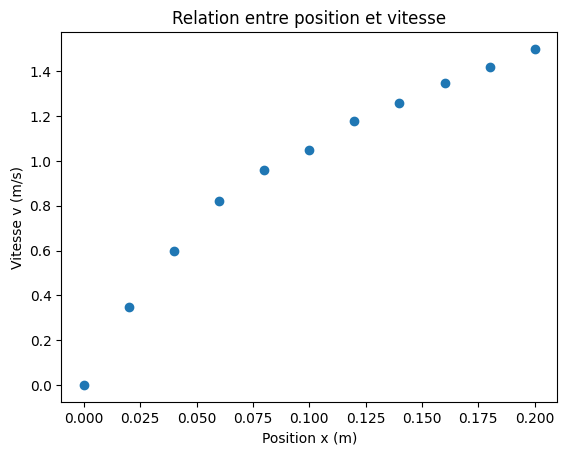

In [35]:
import matplotlib.pyplot as plt

plt.scatter(x_np, v_np)
plt.xlabel('Position x (m)')
plt.ylabel('Vitesse v (m/s)')
plt.title('Relation entre position et vitesse')
plt.show()